# Data Visualization

In [1]:
import pandas as pd
import numpy as np
import os
import utilities as utils
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances;
%matplotlib widget

In [2]:
import importlib
importlib.reload(utils)

<module 'utilities' from '/Users/zeyadahmed/Documents/UPEI/2024W/CS4440/Project/ml2/Bacteria-Classification-ML/utilities.py'>

In [3]:
import gc
gc.collect()

0

In [4]:
dataset = 'patho_repr'

In [5]:
labels = []
cgr_mats = []
seqs = []
patho_labs = []
for dir1 in [dir for dir in os.listdir(dataset) if not dir.startswith('.')]:
    for file in os.listdir(os.path.join(dataset, dir1)):
        path_to_file = os.path.join(dataset,dir1,file)
        sequence = utils.read_sequence(path_to_file)
        seqs.append(sequence)
        sequence_reverse_complement = utils.reverse_complement(sequence)
        tmp = utils.cgr(sequence, 'ACGT', 7)
        cgr_mats.append(tmp)
        labels.append(path_to_file.split('/')[1])
        patho_labs.append(1)
print(np.array(labels).shape)

(138,)


In [6]:
dataset = 'non_repr'

In [7]:
for dir1 in [dir for dir in os.listdir(dataset) if not dir.startswith('.')]:
    for file in os.listdir(os.path.join(dataset, dir1)):
        path_to_file = os.path.join(dataset,dir1,file)
        sequence = utils.read_sequence(path_to_file)
        seqs.append(sequence)
        sequence_reverse_complement = utils.reverse_complement(sequence)
        tmp = utils.cgr(sequence, 'ACGT', 7)
        cgr_mats.append(tmp)
        labels.append(path_to_file.split('/')[1])
        patho_labs.append(0)

print(np.array(labels).shape)

(209,)


In [8]:
new_cgrs = []
new_labs = []
new_patho = []
for lab in np.unique(labels):
    idxs = np.where(np.array(labels) == lab)[0]
    new_labs.append(lab)
    new_cgrs.append(np.sum(np.array(cgr_mats)[idxs], axis=0))
    new_patho.append(np.max(np.array(patho_labs)[idxs], axis=0)) #doesnt matter min or max
vector_cgrs = [mat.flatten() for mat in new_cgrs]
print(np.array(new_cgrs).shape)

(53, 128, 128)


In [9]:
normalized_mats = [mat/np.max(mat) for mat in new_cgrs]
vector_cgrs = [mat.flatten() for mat in normalized_mats]

In [10]:
np.array(normalized_mats).shape

(53, 128, 128)

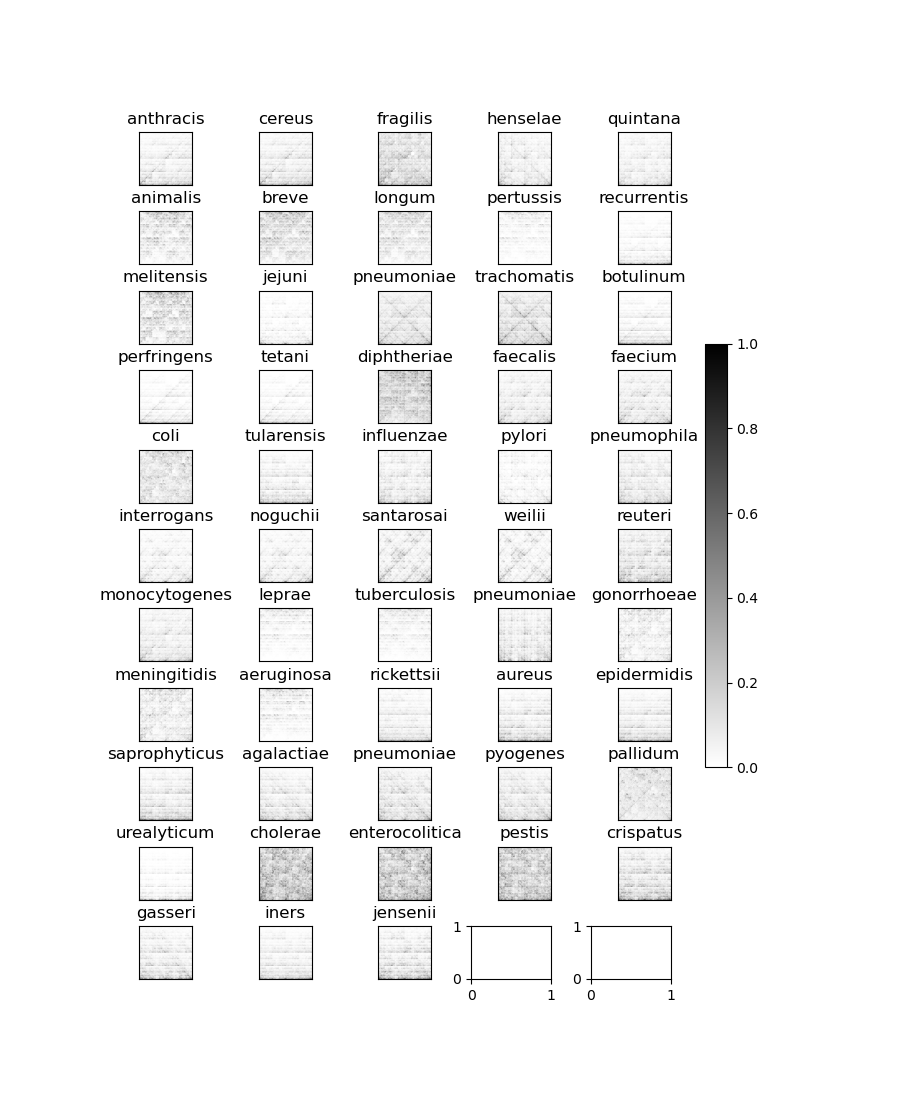

In [11]:
fig,ax = plt.subplots(11,5, figsize=(9,11))
plt.subplots_adjust(wspace=0.5, hspace=0.5)
ax_flat = ax.flatten()
for axs,cgr,lab in zip(ax_flat, normalized_mats, new_labs):
    axs.set_title(lab.split('_')[-1])
    axs.set_xticks([])
    axs.set_yticks([])
    plot = axs.imshow(cgr, cmap='gray_r')
fig.colorbar(plot, ax=ax, shrink=0.5)
plt.show()


In [11]:
D = pairwise_distances(vector_cgrs, metric='manhattan')

In [12]:
np.all(np.diag(D) == 0)

True

In [13]:
np.all(D == D.T)

True

In [14]:
reduced = utils.perform_mds(D, 3, random_state=0)

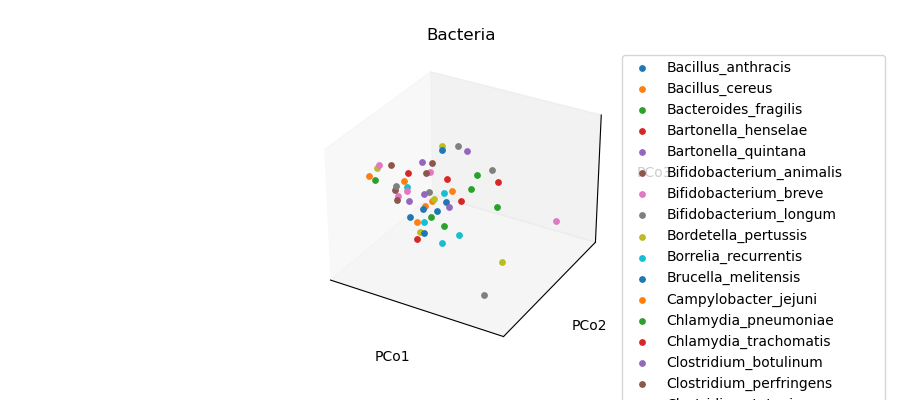

In [65]:
utils.plot_3d(reduced, new_labs)

In [16]:
normalized_mats = [(mat-np.mean(mat))/np.std(mat) for mat in cgr_mats]
vector_cgrs = [mat.flatten() for mat in normalized_mats]
vector_cgrs = np.array([mat.flatten() for mat in normalized_mats])

In [17]:
from sklearn.decomposition import PCA

# Perform PCA
pca = PCA(n_components=3)
pca.fit(vector_cgrs)

# Transform the data to its principal components
transformed_data = pca.transform(vector_cgrs)
comp1 = transformed_data[:, 0]

In [39]:
patho_idxs = np.where(np.array(patho_labs) == 1)[0]
non_idxs = np.where(np.array(patho_labs) == 0)[0]

patho_seqs = np.array(seqs)[patho_idxs]
non_seqs = np.array(seqs)[non_idxs]

In [52]:
cg_content_patho = [(seq.count('C')+seq.count('G'))/len(seq) for seq in patho_seqs]
cg_content_non = [(seq.count('C')+seq.count('G'))/len(seq) for seq in non_seqs]


In [63]:
cg_content = [(seq.count('G')+seq.count('T'))/len(seq) for seq in seqs]

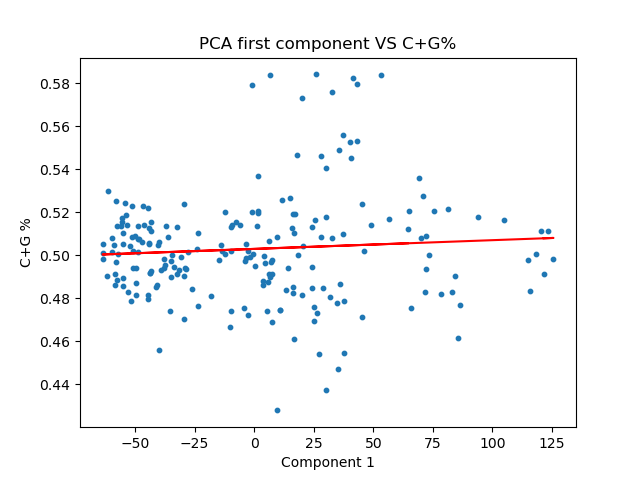

In [64]:
plt.figure()
plt.scatter(comp1, cg_content, s=10)
plt.title('PCA first component VS C+G%')
slope, intercept = np.polyfit(comp1, cg_content, 1)
plt.xlabel('Component 1')
plt.ylabel('C+G %')
plt.plot(comp1, slope*comp1+intercept, c='r')
plt.show()

In [21]:
label_map = {label: i for i,label in enumerate(np.unique(labels))}
dummy_labels = np.array([label_map[lab] for lab in labels])
numerical_to_label = {val: key for key,val in label_map.items()}

print(numerical_to_label)

{0: 'Bacillus_anthracis', 1: 'Bacillus_cereus', 2: 'Bacteroides_fragilis', 3: 'Bartonella_henselae', 4: 'Bartonella_quintana', 5: 'Bifidobacterium_animalis', 6: 'Bifidobacterium_breve', 7: 'Bifidobacterium_longum', 8: 'Bordetella_pertussis', 9: 'Borrelia_recurrentis', 10: 'Brucella_melitensis', 11: 'Campylobacter_jejuni', 12: 'Chlamydia_pneumoniae', 13: 'Chlamydia_trachomatis', 14: 'Clostridium_botulinum', 15: 'Clostridium_perfringens', 16: 'Clostridium_tetani', 17: 'Corynebacterium_diphtheriae', 18: 'Enterococcus_faecalis', 19: 'Enterococcus_faecium', 20: 'Escherichia_coli', 21: 'Francisella_tularensis', 22: 'Haemophilus_influenzae', 23: 'Helicobacter_pylori', 24: 'Legionella_pneumophila', 25: 'Leptospira_interrogans', 26: 'Leptospira_noguchii', 27: 'Leptospira_santarosai', 28: 'Leptospira_weilii', 29: 'Limosilactobacillus_reuteri', 30: 'Listeria_monocytogenes', 31: 'Mycobacterium_leprae', 32: 'Mycobacterium_tuberculosis', 33: 'Mycoplasma_pneumoniae', 34: 'Neisseria_gonorrhoeae', 35: 

In [66]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [69]:
clf_svm = SVC()

In [87]:
clf_rf = RandomForestClassifier(criterion='gini',max_depth=3)
FOLDS = 10
kf = KFold(n_splits=FOLDS, shuffle=True)

In [89]:
accs_rf = []
for train_i, test_j in kf.split(vector_cgrs):
    X_train, X_test = vector_cgrs[train_i], vector_cgrs[test_j]
    y_train, y_test = np.array(patho_labs)[train_i], np.array(patho_labs)[test_j]
    clf_rf.fit(X_train, y_train)
    y_preds = clf_rf.predict(X_test)
    accuracy = 100*accuracy_score(y_test, y_preds)
    accs_rf.append(accuracy)

In [88]:
accs_svm = []
for train_i, test_j in kf.split(vector_cgrs):
    X_train, X_test = vector_cgrs[train_i], vector_cgrs[test_j]
    y_train, y_test = np.array(patho_labs)[train_i], np.array(patho_labs)[test_j]
    clf_svm.fit(X_train, y_train)
    y_preds = clf_svm.predict(X_test)
    accuracy = 100*accuracy_score(y_test, y_preds)
    accs_svm.append(accuracy)

In [74]:
for i,score in enumerate(accs_svm):
    print(f'Fold {i+1}: {score}')

Fold 1: 66.66666666666666
Fold 2: 61.904761904761905
Fold 3: 71.42857142857143
Fold 4: 76.19047619047619
Fold 5: 85.71428571428571
Fold 6: 61.904761904761905
Fold 7: 80.95238095238095
Fold 8: 85.71428571428571
Fold 9: 80.95238095238095
Fold 10: 75.0


In [90]:
for i,score in enumerate(accs_rf):
    print(f'Fold {i+1}: {score}')

Fold 1: 100.0
Fold 2: 66.66666666666666
Fold 3: 76.19047619047619
Fold 4: 80.95238095238095
Fold 5: 61.904761904761905
Fold 6: 47.61904761904761
Fold 7: 71.42857142857143
Fold 8: 80.95238095238095
Fold 9: 71.42857142857143
Fold 10: 65.0


In [78]:
X_tr, X_t, y_tr, y_t = train_test_split(vector_cgrs, patho_labs)

In [80]:
clf_rf.fit(X_tr, y_tr)
clf_svm.fit(X_tr, y_tr)


SVC()

In [81]:
np.mean(clf_rf.predict(X_t) == y_t)

0.7358490566037735

In [82]:
np.mean(clf_svm.predict(X_t) == y_t)


0.6981132075471698

In [83]:
print(np.mean(accs_rf))

69.30952380952381
